<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW8/HiggsBosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/KaggleStuff/"
#!mkdir HiggsBoson
#cd "/content/drive/MyDrive/KaggleStuff/HiggsBoson"


/content/drive/MyDrive/KaggleStuff


In [11]:
!mkdir HiggsBoson

In [13]:
cd "/content/drive/MyDrive/KaggleStuff/HiggsBoson"

/content/drive/MyDrive/KaggleStuff/HiggsBoson


In [26]:
#!mkdir .kaggle 
!mv kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json
!ls .kaggle

kaggle.json


In [27]:
import json
envs = json.load(open(".kaggle/kaggle.json", "r"))
import os
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [28]:
!pip install kaggle

In [29]:
!kaggle competitions download -c higgs-boson

 53% 9.00M/16.9M [00:00<00:00, 35.4MB/s]
100% 16.9M/16.9M [00:00<00:00, 48.4MB/s]
  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 42.6MB/s]
 78% 27.0M/34.8M [00:00<00:00, 69.5MB/s]
100% 34.8M/34.8M [00:00<00:00, 87.7MB/s]
  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 431kB/s]


In [30]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip			 training.zip


In [48]:
import pandas as pd
import json
import os
import pylab as pl
import pprint
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip			 training.zip


In [43]:
df = pd.read_csv('training.zip', compression='zip')

In [44]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [45]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [50]:
pp = pprint.PrettyPrinter(width=41, compact=True)

In [52]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pp.pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [55]:
df.columns[1:-2]

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [56]:
X = df[df.columns[1:-2]]
y = df.Label

In [59]:
le = LabelEncoder()
y = le.fit_transform(y)

In [62]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.33, random_state=1)

In [63]:
rf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

In [64]:
print("Accuracy score Random Forest train data = {:.2f}".format(accuracy_score(y_train, rf.predict(X_train))))
print("Accuracy score Random Forest test data = {:.2f}".format(accuracy_score(y_test, rf.predict(X_test))))

Accuracy score of train data = 1.00
Accuracy score of test data = 0.84


In [65]:
gbt = GradientBoostingClassifier(random_state=5).fit(X_train, y_train)

In [66]:
print("Accuracy score Gradient Boosting train data = {:.2f}".format(accuracy_score(y_train, rf.predict(X_train))))
print("Accuracy score Gradient Boosting test data = {:.2f}".format(accuracy_score(y_test, rf.predict(X_test))))

Accuracy score Gradient Boosting train data = 1.00
Accuracy score Gradient Boosting test data = 0.84


In [71]:
for f, fi in zip(df.columns[1:-2], rf.feature_importances_):
  print(f,fi)

DER_mass_MMC 0.1485369140584492
DER_mass_transverse_met_lep 0.1070336706621162
DER_mass_vis 0.08012630535151212
DER_pt_h 0.0320910504868324
DER_deltaeta_jet_jet 0.020636453396352693
DER_mass_jet_jet 0.019005293285607704
DER_prodeta_jet_jet 0.008256763520033827
DER_deltar_tau_lep 0.04641559455423509
DER_pt_tot 0.029353853435379617
DER_sum_pt 0.02968640936068195
DER_pt_ratio_lep_tau 0.051232620753941915
DER_met_phi_centrality 0.04808016958676688
DER_lep_eta_centrality 0.01567490743891983
PRI_tau_pt 0.05658476486202507
PRI_tau_eta 0.02547202733549634
PRI_tau_phi 0.02394515971745629
PRI_lep_pt 0.028133944630033207
PRI_lep_eta 0.026702416261206386
PRI_lep_phi 0.023902366835320103
PRI_met 0.038417273714067515
PRI_met_phi 0.023895968459404268
PRI_met_sumet 0.02679204100513302
PRI_jet_num 0.004634998020954599
PRI_jet_leading_pt 0.01615600733932482
PRI_jet_leading_eta 0.020611976256834922
PRI_jet_leading_phi 0.01517979610939898
PRI_jet_subleading_pt 0.006109880053726904
PRI_jet_subleading_eta 0

In [72]:
data={'feature_names':df.columns[1:-2],'feature_importance':rf.feature_importances_}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


In [75]:
fi_df.head(20)

,feature_names,feature_importance
0,DER_mass_MMC,0.148537
1,DER_mass_transverse_met_lep,0.107034
2,DER_mass_vis,0.080126
13,PRI_tau_pt,0.056585
10,DER_pt_ratio_lep_tau,0.051233
11,DER_met_phi_centrality,0.048080
7,DER_deltar_tau_lep,0.046416
19,PRI_met,0.038417
3,DER_pt_h,0.032091
9,DER_sum_pt,0.029686


In [79]:
fi_df.feature_names[1:20]

1     DER_mass_transverse_met_lep
2                    DER_mass_vis
13                     PRI_tau_pt
10           DER_pt_ratio_lep_tau
11         DER_met_phi_centrality
7              DER_deltar_tau_lep
19                        PRI_met
3                        DER_pt_h
9                      DER_sum_pt
8                      DER_pt_tot
16                     PRI_lep_pt
21                  PRI_met_sumet
17                    PRI_lep_eta
14                    PRI_tau_eta
15                    PRI_tau_phi
18                    PRI_lep_phi
20                    PRI_met_phi
4            DER_deltaeta_jet_jet
24            PRI_jet_leading_eta
Name: feature_names, dtype: object

In [88]:
all_aucs = {}
 
for depth in [3, 6, 9, 12, 15, 18, 21]:
    print('depth: %s' % depth)
    aucs = []
 
    for i in range(10, 101, 10):
        rf = RandomForestClassifier(n_estimators=i,
              max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
   
    all_aucs[depth] = aucs
    print()

depth: 3
10 -> 0.839
20 -> 0.850
30 -> 0.851
40 -> 0.853
50 -> 0.854
60 -> 0.855
70 -> 0.856
80 -> 0.855
90 -> 0.856
100 -> 0.856

depth: 6
10 -> 0.878
20 -> 0.881
30 -> 0.883
40 -> 0.882
50 -> 0.883
60 -> 0.883
70 -> 0.884
80 -> 0.884
90 -> 0.884
100 -> 0.884

depth: 9
10 -> 0.891
20 -> 0.894
30 -> 0.895
40 -> 0.895
50 -> 0.896
60 -> 0.896
70 -> 0.896
80 -> 0.896
90 -> 0.896
100 -> 0.896

depth: 12
10 -> 0.897
20 -> 0.901
30 -> 0.901
40 -> 0.902
50 -> 0.902
60 -> 0.902
70 -> 0.903
80 -> 0.903
90 -> 0.903
100 -> 0.903

depth: 15
10 -> 0.896
20 -> 0.901
30 -> 0.903
40 -> 0.904
50 -> 0.904
60 -> 0.904
70 -> 0.905
80 -> 0.905
90 -> 0.905
100 -> 0.905

depth: 18
10 -> 0.892
20 -> 0.900
30 -> 0.902
40 -> 0.903
50 -> 0.904
60 -> 0.904
70 -> 0.905
80 -> 0.905
90 -> 0.905
100 -> 0.905

depth: 21
10 -> 0.888
20 -> 0.897
30 -> 0.900
40 -> 0.902
50 -> 0.903
60 -> 0.904
70 -> 0.904
80 -> 0.905
90 -> 0.905
100 -> 0.905



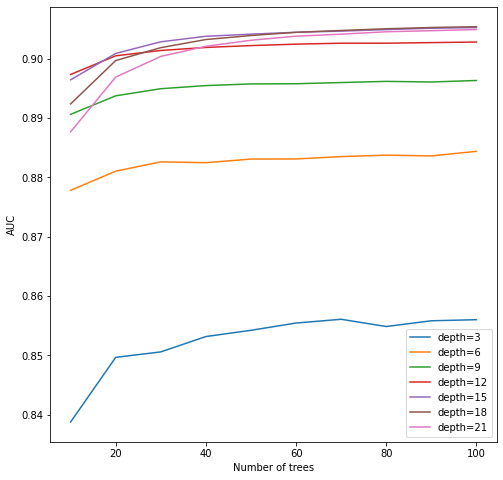

In [90]:
plt.figure(figsize=(8,8))
num_trees = list(range(10, 101, 10))
plt.plot(num_trees, all_aucs[3], label='depth=3')
plt.plot(num_trees, all_aucs[6], label='depth=6')
plt.plot(num_trees, all_aucs[9], label='depth=9')
plt.plot(num_trees, all_aucs[12], label='depth=12')
plt.plot(num_trees, all_aucs[15], label='depth=15')
plt.plot(num_trees, all_aucs[18], label='depth=18')
plt.plot(num_trees, all_aucs[21], label='depth=21')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.legend();